In [1]:
import pandas as pd
import numpy as np
from prophet import Prophet
from sklearn.metrics import mean_squared_error

c:\Users\HP\Desktop\Interview Prep\AI Engineer\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_Train = pd.read_csv('./DailyDelhiClimateTrain.csv')
df_Test = pd.read_csv('./DailyDelhiClimateTest.csv')
df = df_Train

In [3]:
df_Train

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


In [4]:
df_Test

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333
...,...,...,...,...,...
109,2017-04-20,34.500000,27.500000,5.562500,998.625000
110,2017-04-21,34.250000,39.375000,6.962500,999.875000
111,2017-04-22,32.900000,40.900000,8.890000,1001.600000
112,2017-04-23,32.875000,27.500000,9.962500,1002.125000


In [5]:
df

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


##### Univariate Forecasting
- Date
- Meantemp (y)

In [6]:
df_Train = df_Train.rename(columns={'meantemp':'y','date':'ds'})

In [7]:
df_Train

,ds,y,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


In [8]:
df_Train['y_orig'] = df_Train['y']

In [9]:
df_Train['y']=np.log(df_Train['y'])

In [10]:
df_Train.head()

,ds,y,humidity,wind_speed,meanpressure,y_orig
0,2013-01-01,2.302585,84.500000,0.000000,1015.666667,10.000000
1,2013-01-02,2.001480,92.000000,2.980000,1017.800000,7.400000
2,2013-01-03,1.969441,87.000000,4.633333,1018.666667,7.166667
3,2013-01-04,2.159484,71.333333,1.233333,1017.166667,8.666667
4,2013-01-05,1.791759,86.833333,3.700000,1016.500000,6.000000


In [11]:
model = Prophet()
model.fit(df_Train)

18:18:52 - cmdstanpy - INFO - Chain [1] start processing
18:18:55 - cmdstanpy - INFO - Chain [1] done processing


In [73]:
future_data = model.make_future_dataframe(periods=113,freq='D')
forecast_Data = model.predict(future_data)
forecast_Data[['ds','yhat','yhat_lower','yhat_upper']].tail(5)

,ds,yhat,yhat_lower,yhat_upper
1570,2017-04-20,3.550271,3.422500,3.676516
1571,2017-04-21,3.554038,3.438254,3.680027
1572,2017-04-22,3.554314,3.425368,3.685761
1573,2017-04-23,3.553681,3.421681,3.678161
1574,2017-04-24,3.570943,3.455430,3.706923


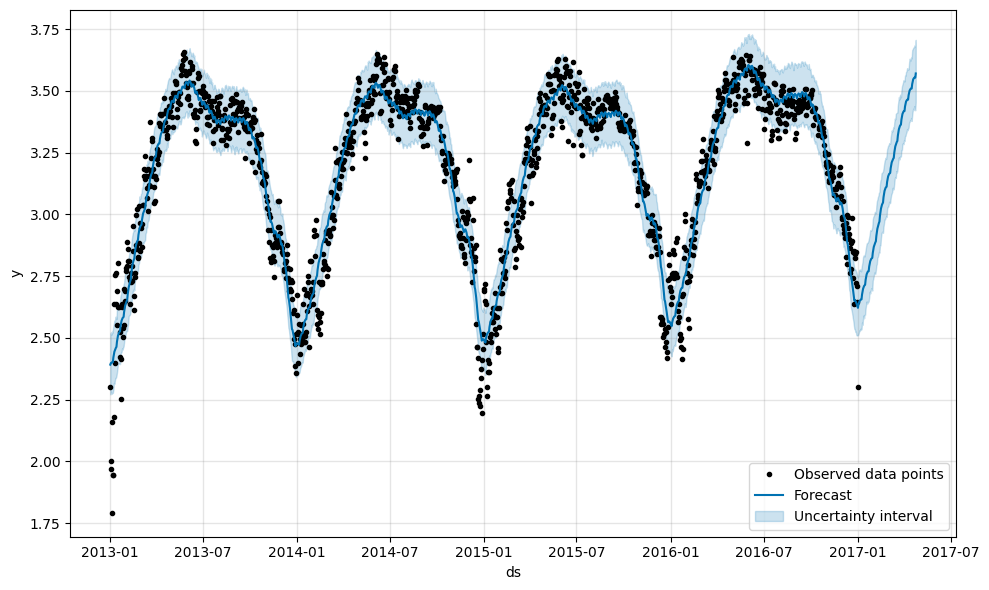

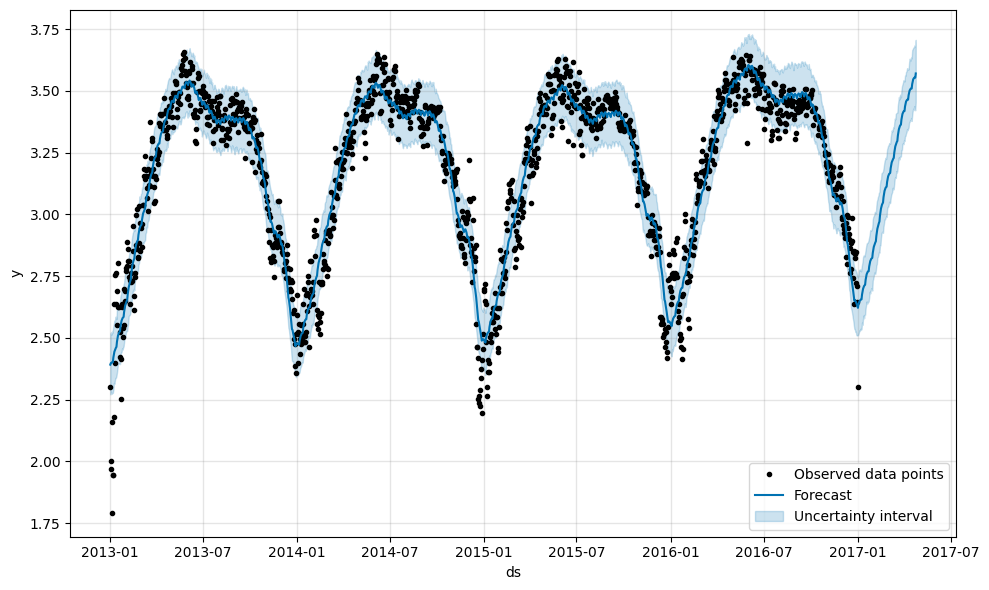

In [74]:
model.plot(forecast_Data,include_legend=True)

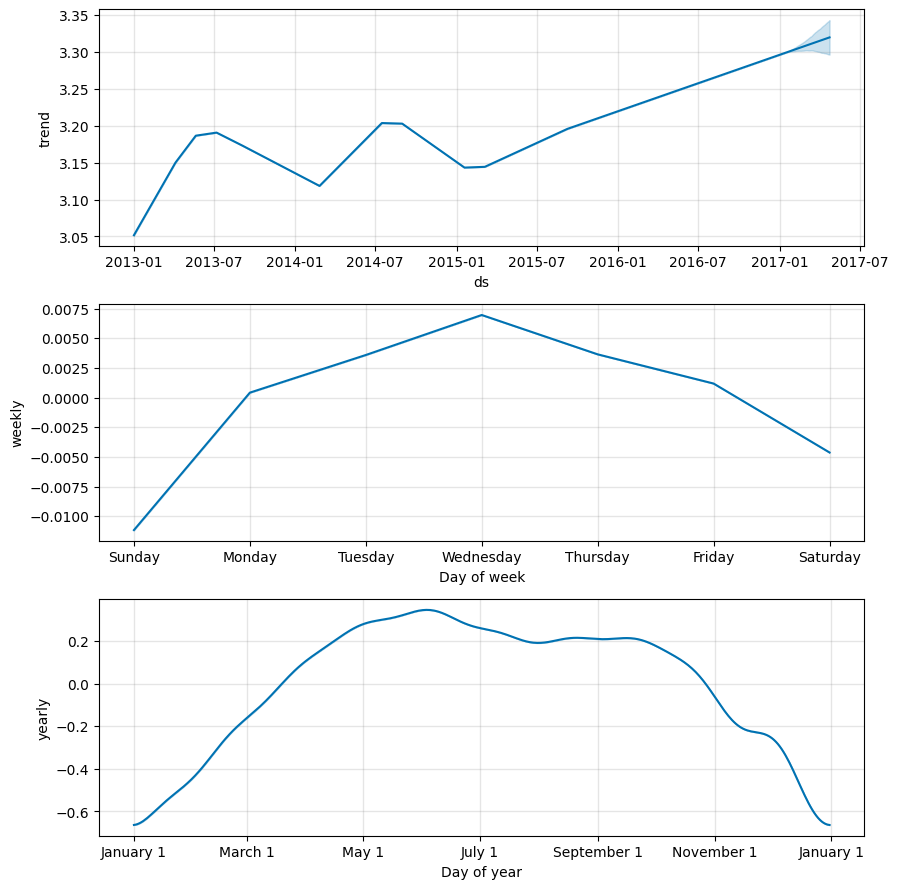

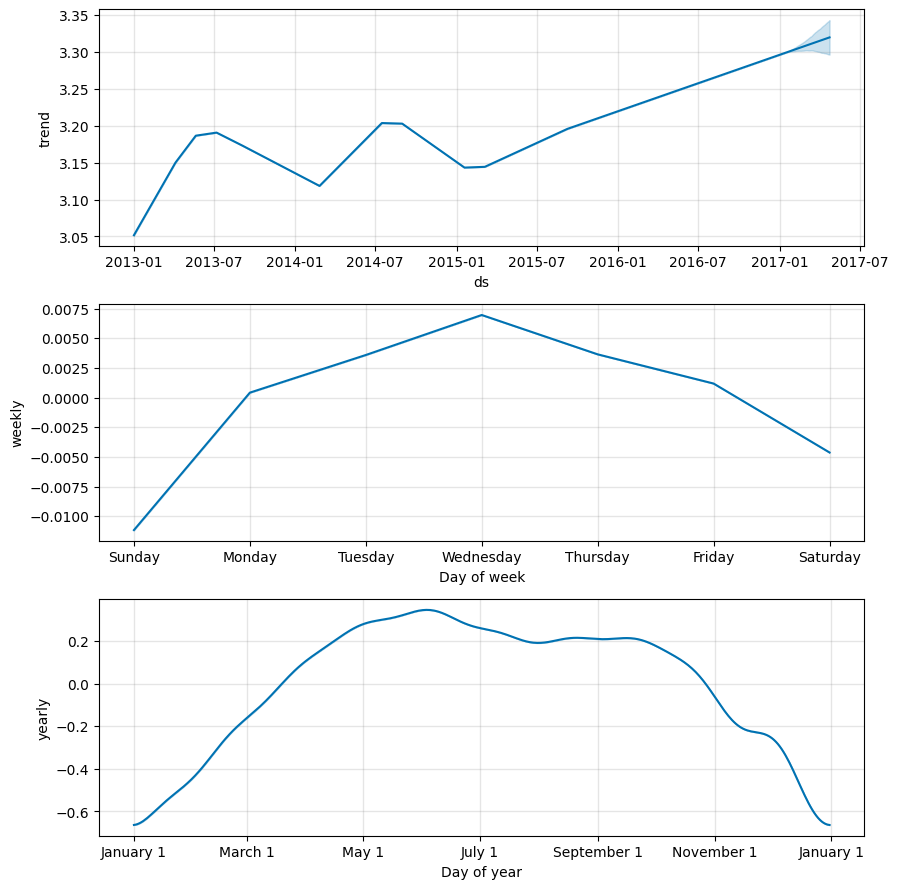

In [75]:
model.plot_components(forecast_Data)

In [76]:
forecast_Data[['ds','yhat','yhat_lower','yhat_upper']].tail(5)

,ds,yhat,yhat_lower,yhat_upper
1570,2017-04-20,3.550271,3.422500,3.676516
1571,2017-04-21,3.554038,3.438254,3.680027
1572,2017-04-22,3.554314,3.425368,3.685761
1573,2017-04-23,3.553681,3.421681,3.678161
1574,2017-04-24,3.570943,3.455430,3.706923


In [77]:
forecast_Data_orig = forecast_Data
forecast_Data_orig['yhat'] = np.exp(forecast_Data_orig['yhat'])
forecast_Data_orig['yhat_upper'] = np.exp(forecast_Data_orig['yhat_upper'])
forecast_Data_orig['yhat_lower'] = np.exp(forecast_Data_orig['yhat_lower'])

In [78]:
forecast_Data.tail(5)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1570,2017-04-20,3.319220,30.645924,39.508520,3.297279,3.341448,0.231050,0.231050,0.231050,0.003641,0.003641,0.003641,0.227409,0.227409,0.227409,0.0,0.0,0.0,34.822746
1571,2017-04-21,3.319430,31.132559,39.647467,3.297117,3.341845,0.234608,0.234608,0.234608,0.001182,0.001182,0.001182,0.233427,0.233427,0.233427,0.0,0.0,0.0,34.954178
1572,2017-04-22,3.319639,30.733939,39.875447,3.296980,3.342297,0.234675,0.234675,0.234675,-0.004622,-0.004622,-0.004622,0.239298,0.239298,0.239298,0.0,0.0,0.0,34.963831
1573,2017-04-23,3.319848,30.620854,39.573557,3.296817,3.342943,0.233833,0.233833,0.233833,-0.011156,-0.011156,-0.011156,0.244989,0.244989,0.244989,0.0,0.0,0.0,34.941703
1574,2017-04-24,3.320057,31.671901,40.728307,3.296692,3.343493,0.250886,0.250886,0.250886,0.000416,0.000416,0.000416,0.250470,0.250470,0.250470,0.0,0.0,0.0,35.550112


In [79]:
forecast_Data_orig

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,3.051742,9.691890,12.379616,3.051742,3.051742,-0.660064,-0.660064,-0.660064,0.003585,0.003585,0.003585,-0.663649,-0.663649,-0.663649,0.0,0.0,0.0,10.931824
1,2013-01-02,3.052793,9.792448,12.447710,3.052793,3.052793,-0.655078,-0.655078,-0.655078,0.006954,0.006954,0.006954,-0.662031,-0.662031,-0.662031,0.0,0.0,0.0,10.998015
2,2013-01-03,3.053843,9.705011,12.334469,3.053843,3.053843,-0.655527,-0.655527,-0.655527,0.003641,0.003641,0.003641,-0.659168,-0.659168,-0.659168,0.0,0.0,0.0,11.004623
3,2013-01-04,3.054893,9.748098,12.494578,3.054893,3.054893,-0.653998,-0.653998,-0.653998,0.001182,0.001182,0.001182,-0.655180,-0.655180,-0.655180,0.0,0.0,0.0,11.033046
4,2013-01-05,3.055943,9.742037,12.427758,3.055943,3.055943,-0.654816,-0.654816,-0.654816,-0.004622,-0.004622,-0.004622,-0.650194,-0.650194,-0.650194,0.0,0.0,0.0,11.035606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1570,2017-04-20,3.319220,30.645924,39.508520,3.297279,3.341448,0.231050,0.231050,0.231050,0.003641,0.003641,0.003641,0.227409,0.227409,0.227409,0.0,0.0,0.0,34.822746
1571,2017-04-21,3.319430,31.132559,39.647467,3.297117,3.341845,0.234608,0.234608,0.234608,0.001182,0.001182,0.001182,0.233427,0.233427,0.233427,0.0,0.0,0.0,34.954178
1572,2017-04-22,3.319639,30.733939,39.875447,3.296980,3.342297,0.234675,0.234675,0.234675,-0.004622,-0.004622,-0.004622,0.239298,0.239298,0.239298,0.0,0.0,0.0,34.963831
1573,2017-04-23,3.319848,30.620854,39.573557,3.296817,3.342943,0.233833,0.233833,0.233833,-0.011156,-0.011156,-0.011156,0.244989,0.244989,0.244989,0.0,0.0,0.0,34.941703


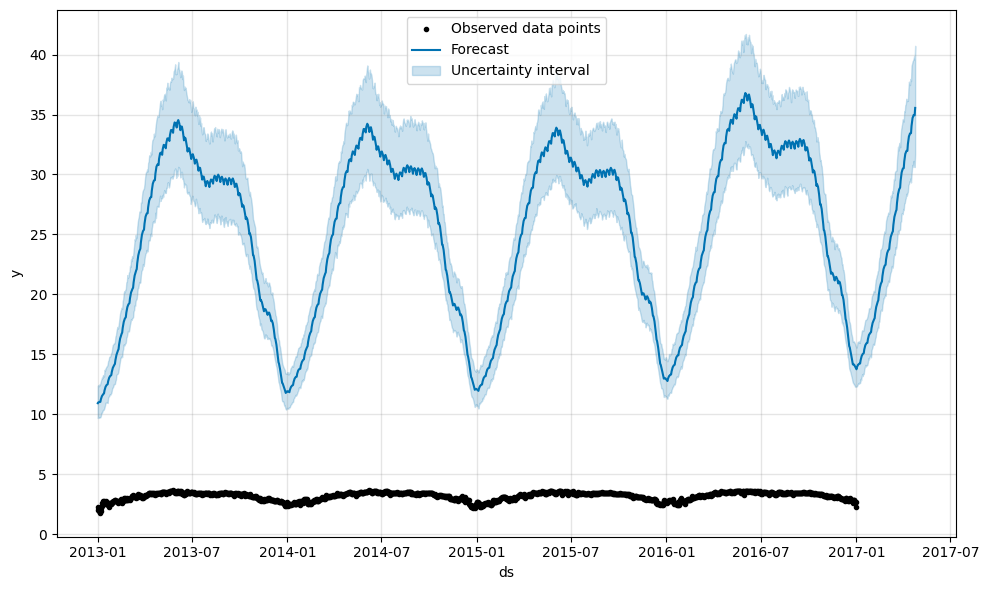

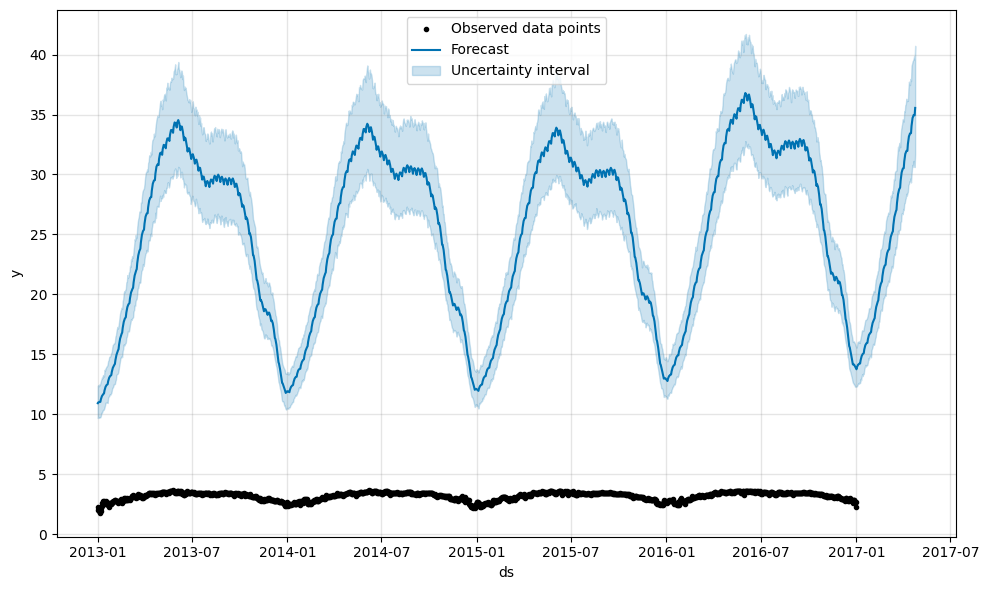

In [80]:
model.plot(forecast_Data_orig,include_legend=True)

In [81]:
# copy the log transformed data to another column

df_Train['y_log']= df_Train['y']
df_Train['y']= df_Train['y_orig']

In [82]:
final_Df = pd.DataFrame(forecast_Data_orig)


import plotly.graph_objects as go
import plotly.offline as plo

In [91]:
final_Df

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,3.051742,9.691890,12.379616,3.051742,3.051742,-0.660064,-0.660064,-0.660064,0.003585,0.003585,0.003585,-0.663649,-0.663649,-0.663649,0.0,0.0,0.0,10.931824
1,2013-01-02,3.052793,9.792448,12.447710,3.052793,3.052793,-0.655078,-0.655078,-0.655078,0.006954,0.006954,0.006954,-0.662031,-0.662031,-0.662031,0.0,0.0,0.0,10.998015
2,2013-01-03,3.053843,9.705011,12.334469,3.053843,3.053843,-0.655527,-0.655527,-0.655527,0.003641,0.003641,0.003641,-0.659168,-0.659168,-0.659168,0.0,0.0,0.0,11.004623
3,2013-01-04,3.054893,9.748098,12.494578,3.054893,3.054893,-0.653998,-0.653998,-0.653998,0.001182,0.001182,0.001182,-0.655180,-0.655180,-0.655180,0.0,0.0,0.0,11.033046
4,2013-01-05,3.055943,9.742037,12.427758,3.055943,3.055943,-0.654816,-0.654816,-0.654816,-0.004622,-0.004622,-0.004622,-0.650194,-0.650194,-0.650194,0.0,0.0,0.0,11.035606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1570,2017-04-20,3.319220,30.645924,39.508520,3.297279,3.341448,0.231050,0.231050,0.231050,0.003641,0.003641,0.003641,0.227409,0.227409,0.227409,0.0,0.0,0.0,34.822746
1571,2017-04-21,3.319430,31.132559,39.647467,3.297117,3.341845,0.234608,0.234608,0.234608,0.001182,0.001182,0.001182,0.233427,0.233427,0.233427,0.0,0.0,0.0,34.954178
1572,2017-04-22,3.319639,30.733939,39.875447,3.296980,3.342297,0.234675,0.234675,0.234675,-0.004622,-0.004622,-0.004622,0.239298,0.239298,0.239298,0.0,0.0,0.0,34.963831
1573,2017-04-23,3.319848,30.620854,39.573557,3.296817,3.342943,0.233833,0.233833,0.233833,-0.011156,-0.011156,-0.011156,0.244989,0.244989,0.244989,0.0,0.0,0.0,34.941703


In [83]:
# Plot predicted and actual line graph with X=dates , Y=Outbound

actual_chart = go.Scatter(y=df_Train['y_orig'],name='Actual')
predict_chart = go.Scatter(y=final_Df['yhat'],name='Predicted')
predict_chart_upper = go.Scatter(y=final_Df['yhat_upper'],name='Predicted Upper')
predict_chart_lower = go.Scatter(y=final_Df['yhat_lower'],name='Predicted Lower')

plo.plot([actual_chart,predict_chart,predict_chart_upper,predict_chart_lower], image_width = 400, image_height = 400)

'temp-plot.html'

In [84]:
df_Test.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [85]:
rows = final_Df['yhat'].tail(113)

In [93]:
df_Test.tail(113)

,date,meantemp,humidity,wind_speed,meanpressure
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333
5,2017-01-06,19.318182,79.318182,8.681818,1011.772727
...,...,...,...,...,...
109,2017-04-20,34.500000,27.500000,5.562500,998.625000
110,2017-04-21,34.250000,39.375000,6.962500,999.875000
111,2017-04-22,32.900000,40.900000,8.890000,1001.600000
112,2017-04-23,32.875000,27.500000,9.962500,1002.125000


In [86]:
rows

1462    13.943480
1463    14.030775
1464    14.137336
1465    14.163976
1466    14.215066
          ...    
1570    34.822746
1571    34.954178
1572    34.963831
1573    34.941703
1574    35.550112
Name: yhat, Length: 113, dtype: float64

In [95]:
rows=rows.reset_index(drop=True)

In [96]:
type(rows)

pandas.core.series.Series

In [97]:
len(df_Test)

114

In [98]:
rows

0      13.943480
1      14.030775
2      14.137336
3      14.163976
4      14.215066
         ...    
108    34.822746
109    34.954178
110    34.963831
111    34.941703
112    35.550112
Name: yhat, Length: 113, dtype: float64

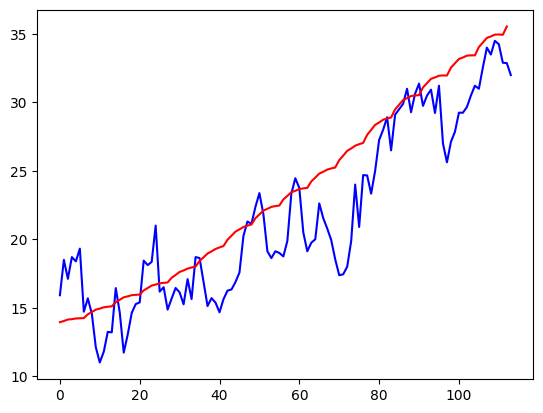

In [99]:
import matplotlib.pyplot as plt
plt.plot(df_Test['meantemp'],color='blue')
plt.plot(rows,color='red')
plt.show()

##### Multivariate Forecasting

In [144]:
df_TrainNew = pd.read_csv('./DailyDelhiClimateTrain.csv')
df_TestNew = pd.read_csv('./DailyDelhiClimateTest.csv')
dfNew = df_TrainNew

In [145]:
df_TrainNew

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


In [146]:
df_TestNew

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333
...,...,...,...,...,...
109,2017-04-20,34.500000,27.500000,5.562500,998.625000
110,2017-04-21,34.250000,39.375000,6.962500,999.875000
111,2017-04-22,32.900000,40.900000,8.890000,1001.600000
112,2017-04-23,32.875000,27.500000,9.962500,1002.125000


In [147]:
dfNew

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


In [148]:
df_TrainNew = df_TrainNew.rename(columns={'meantemp':'y','date':'ds'})

In [149]:
df_TrainNew['y_orig']=df_TrainNew['y']
df_TrainNew['y']=np.log(df_TrainNew['y'])

In [150]:
df_TrainNew

,ds,y,humidity,wind_speed,meanpressure,y_orig
0,2013-01-01,2.302585,84.500000,0.000000,1015.666667,10.000000
1,2013-01-02,2.001480,92.000000,2.980000,1017.800000,7.400000
2,2013-01-03,1.969441,87.000000,4.633333,1018.666667,7.166667
3,2013-01-04,2.159484,71.333333,1.233333,1017.166667,8.666667
4,2013-01-05,1.791759,86.833333,3.700000,1016.500000,6.000000
...,...,...,...,...,...,...
1457,2016-12-28,2.845920,68.043478,3.547826,1015.565217,17.217391
1458,2016-12-29,2.723799,87.857143,6.000000,1016.904762,15.238095
1459,2016-12-30,2.645837,89.666667,6.266667,1017.904762,14.095238
1460,2016-12-31,2.711553,87.000000,7.325000,1016.100000,15.052632


In [151]:
model_new = Prophet()
model_new.add_regressor('humidity')
model_new.add_regressor('wind_speed')
model_new.add_regressor('meanpressure')


In [152]:
model_new.fit(df_TrainNew)

19:41:44 - cmdstanpy - INFO - Chain [1] start processing
19:41:45 - cmdstanpy - INFO - Chain [1] done processing


In [153]:
len(df_TestNew)

114

In [154]:
future_data = model_new.make_future_dataframe(periods=114,freq='D')

In [155]:
future_data.head()

,ds
0,2013-01-01
1,2013-01-02
2,2013-01-03
3,2013-01-04
4,2013-01-05


In [156]:
dfNew = pd.concat([dfNew, df_TestNew], ignore_index=True)
dfNew= dfNew.rename(columns={'meantemp':'y','date':'ds'})
future_data=dfNew[['ds','humidity','wind_speed','meanpressure','y']]

In [157]:
future_data.head()

,ds,humidity,wind_speed,meanpressure,y
0,2013-01-01,84.500000,0.000000,1015.666667,10.000000
1,2013-01-02,92.000000,2.980000,1017.800000,7.400000
2,2013-01-03,87.000000,4.633333,1018.666667,7.166667
3,2013-01-04,71.333333,1.233333,1017.166667,8.666667
4,2013-01-05,86.833333,3.700000,1016.500000,6.000000


In [158]:
forecast_Data = model_new.predict(future_data)

In [159]:
forecast_Data

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,extra_regressors_additive,...,wind_speed,wind_speed_lower,wind_speed_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,3.033063,2.239502,2.460522,3.033063,3.033063,-0.685616,-0.685616,-0.685616,-0.102248,...,0.009666,0.009666,0.009666,-0.586057,-0.586057,-0.586057,0.0,0.0,0.0,2.347447
1,2013-01-02,3.034284,2.206523,2.428897,3.034284,3.034284,-0.720961,-0.720961,-0.720961,-0.141862,...,0.005431,0.005431,0.005431,-0.582779,-0.582779,-0.582779,0.0,0.0,0.0,2.313324
2,2013-01-03,3.035506,2.223612,2.441411,3.035506,3.035506,-0.700309,-0.700309,-0.700309,-0.120644,...,0.003082,0.003082,0.003082,-0.578234,-0.578234,-0.578234,0.0,0.0,0.0,2.335197
3,2013-01-04,3.036728,2.317754,2.528652,3.036728,3.036728,-0.614220,-0.614220,-0.614220,-0.041933,...,0.007914,0.007914,0.007914,-0.572568,-0.572568,-0.572568,0.0,0.0,0.0,2.422507
4,2013-01-05,3.037949,2.248985,2.464877,3.037949,3.037949,-0.683447,-0.683447,-0.683447,-0.118514,...,0.004408,0.004408,0.004408,-0.565943,-0.565943,-0.565943,0.0,0.0,0.0,2.354502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1571,2017-04-20,3.309934,3.473581,3.680915,3.290035,3.327978,0.265442,0.265442,0.265442,0.158736,...,0.001762,0.001762,0.001762,0.108137,0.108137,0.108137,0.0,0.0,0.0,3.575376
1572,2017-04-21,3.310136,3.405051,3.633205,3.290031,3.328460,0.213875,0.213875,0.213875,0.100747,...,-0.000228,-0.000228,-0.000228,0.112847,0.112847,0.112847,0.0,0.0,0.0,3.524011
1573,2017-04-22,3.310339,3.407991,3.636053,3.289993,3.328849,0.209577,0.209577,0.209577,0.090804,...,-0.002967,-0.002967,-0.002967,0.117763,0.117763,0.117763,0.0,0.0,0.0,3.519916
1574,2017-04-23,3.310541,3.459633,3.689269,3.289828,3.329230,0.268686,0.268686,0.268686,0.152456,...,-0.004491,-0.004491,-0.004491,0.122832,0.122832,0.122832,0.0,0.0,0.0,3.579227


In [160]:
forecast_Data[['ds','yhat','yhat_lower','yhat_upper']].tail(5)

,ds,yhat,yhat_lower,yhat_upper
1571,2017-04-20,3.575376,3.473581,3.680915
1572,2017-04-21,3.524011,3.405051,3.633205
1573,2017-04-22,3.519916,3.407991,3.636053
1574,2017-04-23,3.579227,3.459633,3.689269
1575,2017-04-24,3.590121,3.480175,3.701013


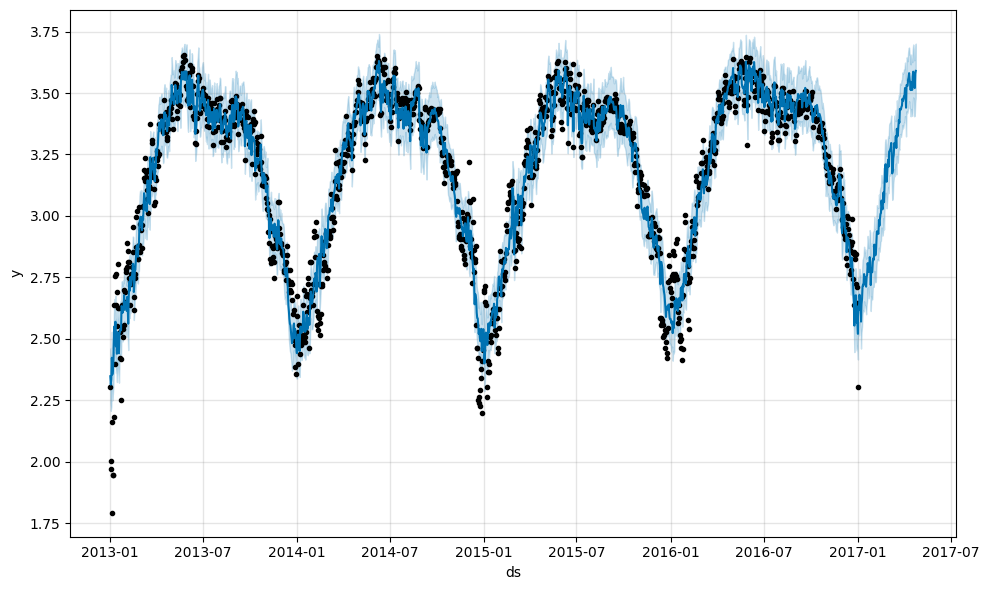

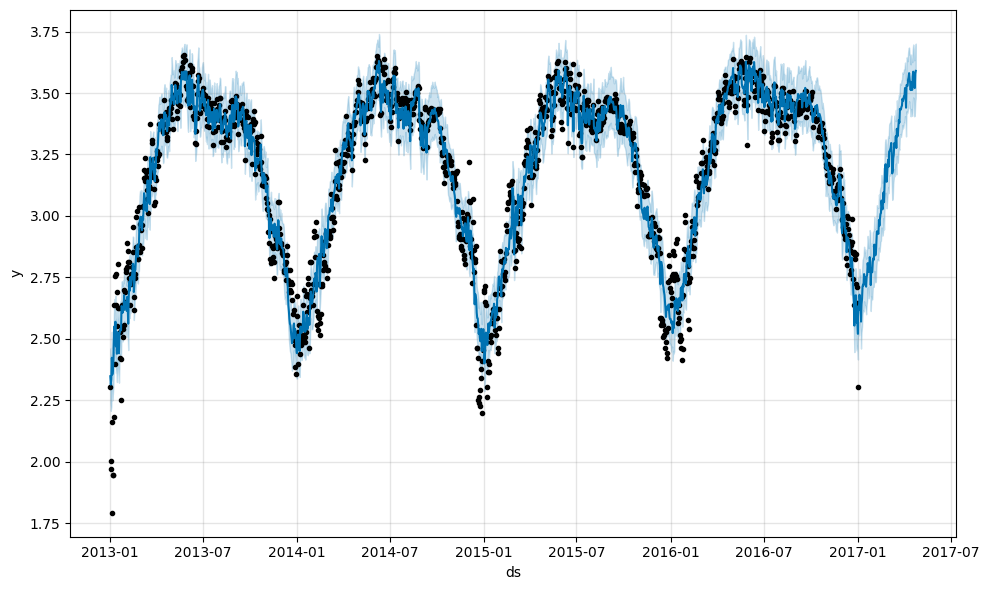

In [161]:
model_new.plot(forecast_Data)

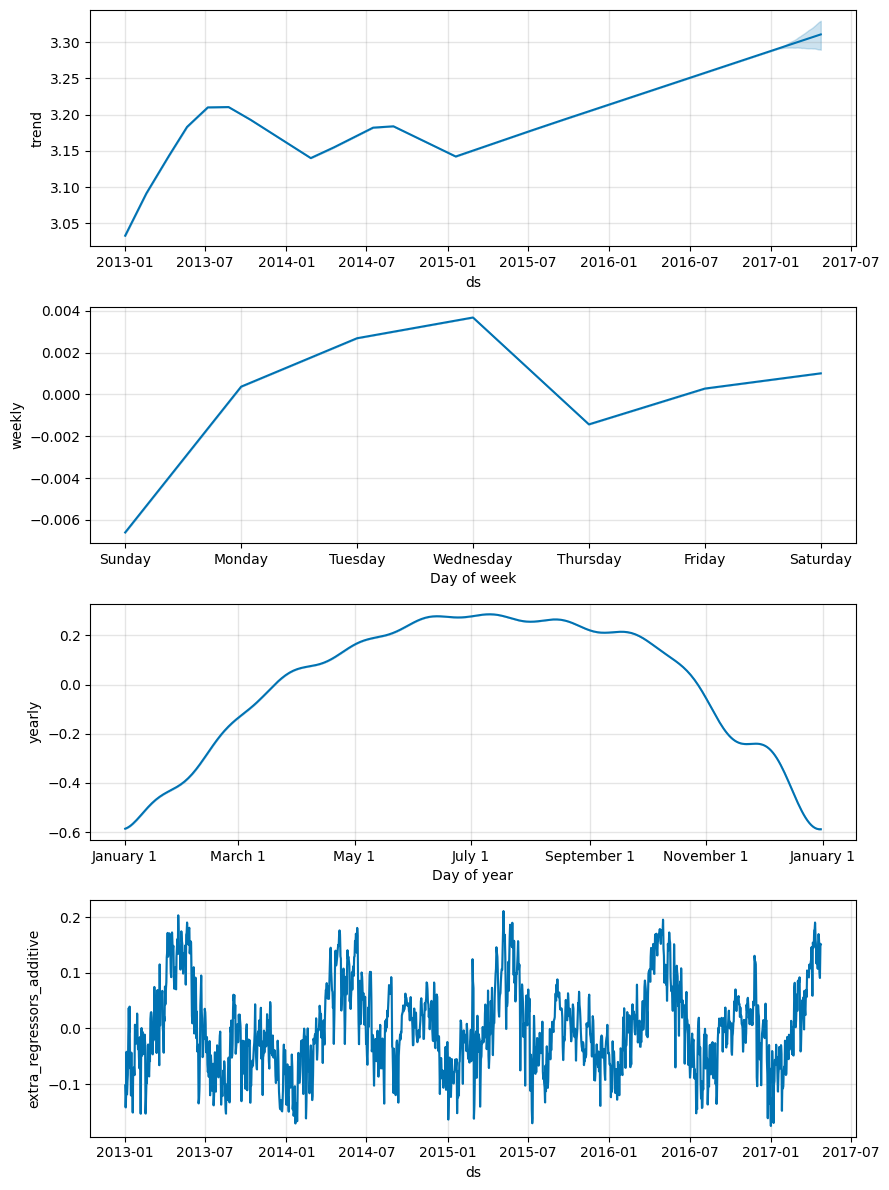

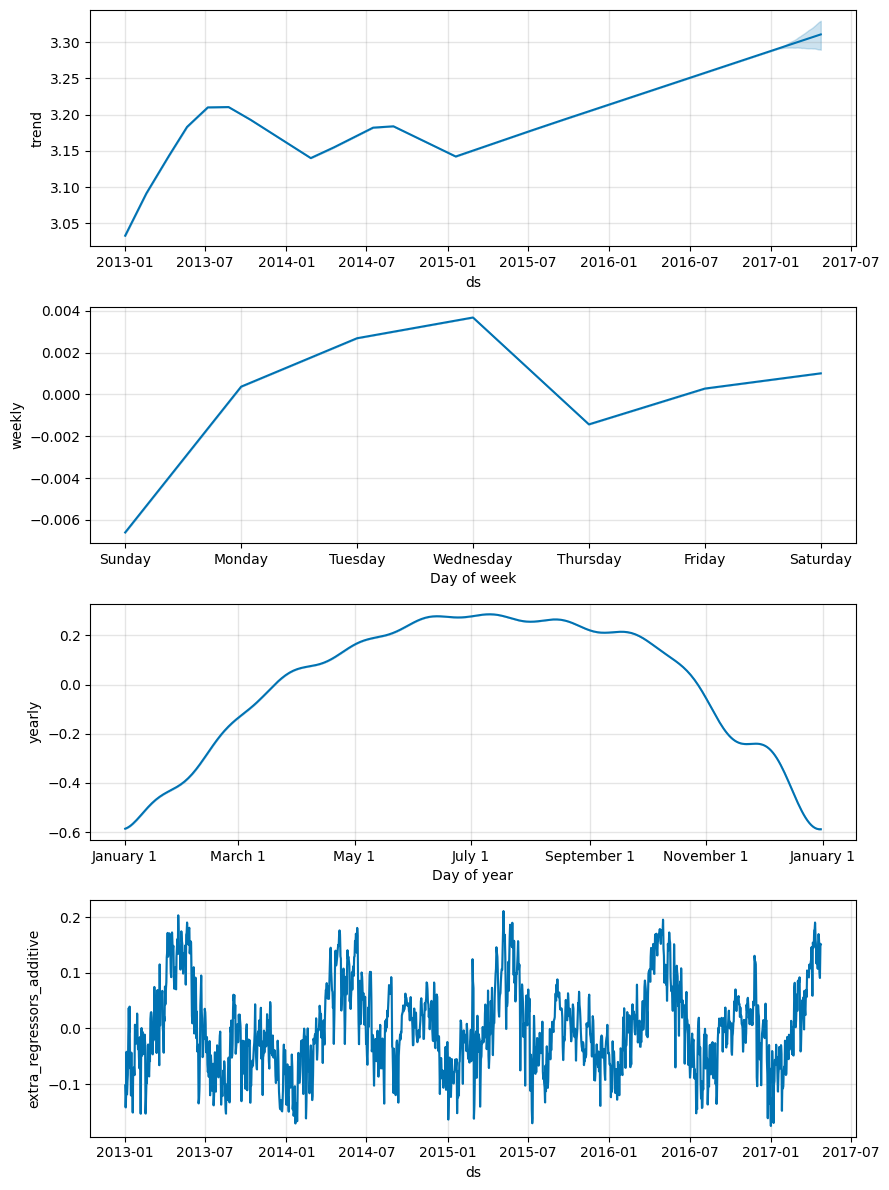

In [162]:
model_new.plot_components(forecast_Data)

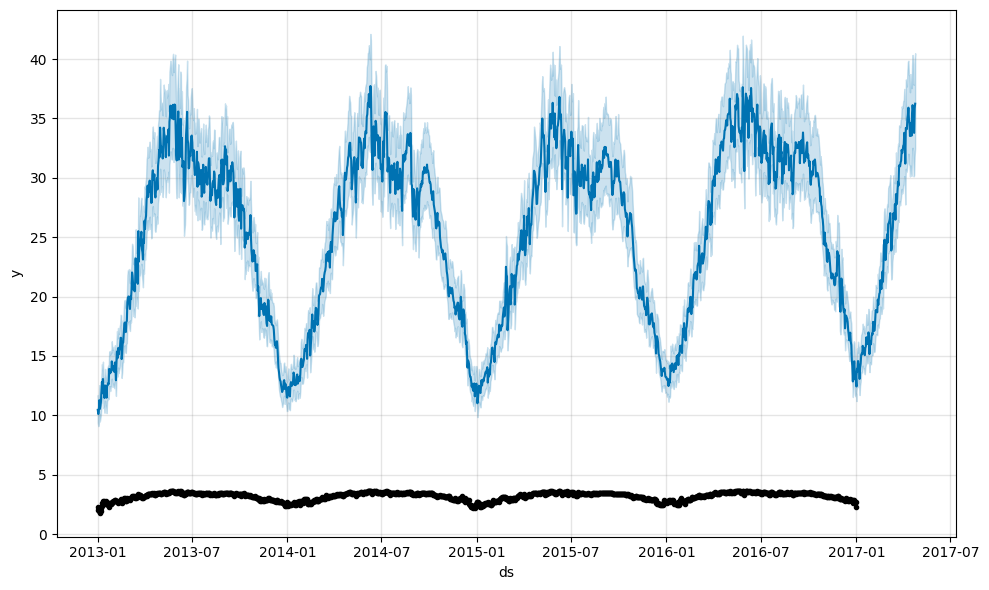

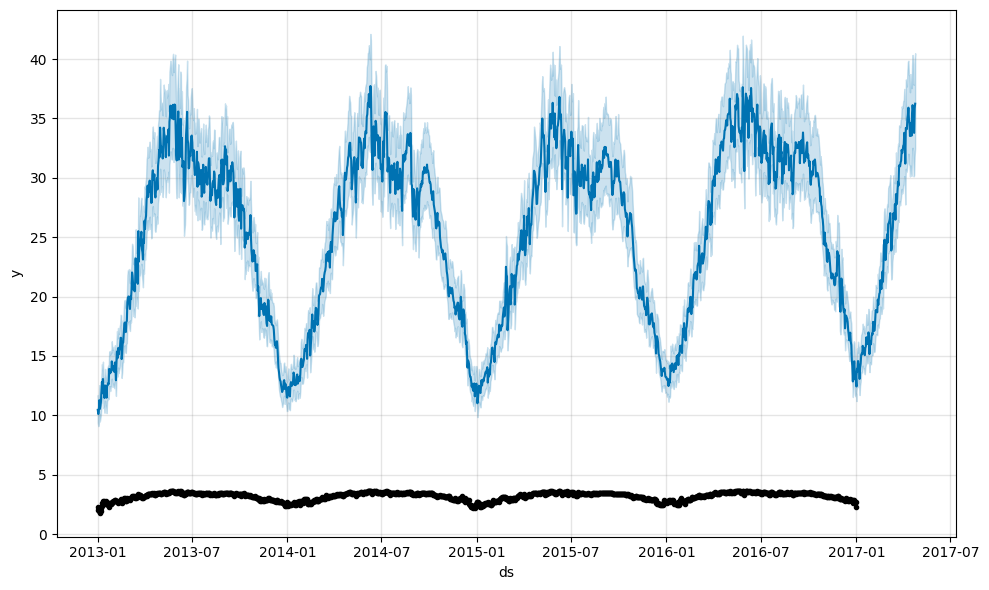

In [163]:
forecast_Data_orig = forecast_Data
forecast_Data_orig['yhat'] = np.exp(forecast_Data_orig['yhat'])
forecast_Data_orig['yhat_upper'] = np.exp(forecast_Data_orig['yhat_upper'])
forecast_Data_orig['yhat_lower'] = np.exp(forecast_Data_orig['yhat_lower'])

model_new.plot(forecast_Data_orig)

In [164]:
df_TrainNew['y_log'] = df_TrainNew['y']
df_TrainNew['y']=df_TrainNew['y_orig']

In [175]:
final_Df = pd.DataFrame(forecast_Data_orig)
import plotly.graph_objs as go
import plotly.offline as plo

#Plot predicted and actual line graph with X=dates, Y=OutBound


actual_chart = go.Scatter(y=dfNew['y'],name='Actual')
predict_chart = go.Scatter(y=final_Df['yhat'],name='Predicted')
predict_chart_upper = go.Scatter(y=final_Df['yhat_upper'],name='Predicted Upper')
predict_chart_lower = go.Scatter(y=final_Df['yhat_lower'],name='Predicted Lower')

plo.plot([actual_chart,predict_chart,predict_chart_upper,predict_chart_lower], image_width = 400, image_height = 400)

'temp-plot.html'

In [169]:
final_Df['yhat']

0       10.458836
1       10.107963
2       10.331493
3       11.274093
4       10.532884
          ...    
1571    35.708040
1572    33.920217
1573    33.781578
1574    35.845805
1575    36.238443
Name: yhat, Length: 1576, dtype: float64